#                             Assignment on Machine learning for predictive problems                                                           
Md Shamsuzzaman                                                                                 01.11.2018

# Tasks
Take Abalone dataset. Run some clustering method (except k-means) with different number of clusters.
Which number of clusters is better? (use "score")

1. ake Abalone dataset. Reduce it’s dimensionality to 3 with Kernel PCA, then run clustering with 10 clusters.

2. What age have the cluster centriods?

3. Don’t forget to apply feature normalisation before clustering, and inverse feature normalisation for the cluster centres!

Label propagation:

4. cluster Abalone dataset without age (rings) feature using Gaussian Mixture Model take randomly 20 samples with age from the original Abalone dataset, predict their probabilities with GaussianMM ("predict_proba")

5. compute class distribution for each Gaussian component

6. compute Gaussian components for each original data point

7. compute labels of original data points by multiplying their Gaussian components by class distribution of these components
How correct was this label propagation?

Necessary libraries import

In [1]:
import numpy as np
import pandas as pd
from matplotlib import cm,pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
#import scikitlearn as sklearn
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


#Call required libraries
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
#import plotly.plotly as py #For World Map
#import plotly.graph_objs as go
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import Normalizer
from sklearn.mixture import GMM    #For GMM clustering
from sklearn import metrics

import os                     # For os related operations
import sys                    # For data size
! pip install mglearn
import mglearn

Data import and some basic statistics

In [2]:
names = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
X_df = pd.read_csv("abalone.csv", header=None, names = names, sep =";")
X_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
#data = X_df.copy()
#X_df.shape
#print(X_df.info)
#print(X_df.describe())

In [4]:
replace_list = {"Sex" : {"M": 0, "F" : 1, "I": 2}}
X_df.replace(replace_list,inplace=True)

In [5]:
X_df.head()
X_df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,0,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [6]:
#data_ns = X_df.copy()
#data_ns.drop("Sex", axis=1, inplace=True) # Without sex data
#data_ns.head()

Heatmap

Heatmap represents the correlation among the variables. The side value bar, the color paleette, indicates the intensity of correlation. The lighter shade reveales high intensity of correlation.

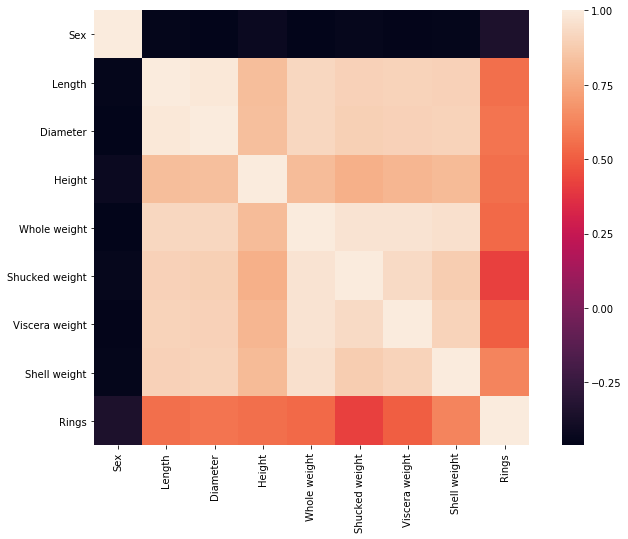

In [7]:
plt.figure(figsize=(12,8))
correlation = X_df.corr()
sns.heatmap(correlation, square=True)
plt.show()

In [8]:
# Droping the features Sex and Rings
data = X_df.drop(["Sex","Rings"], axis=1)

In [9]:
#X_df.head()

In [10]:
#dbscan = DBSCAN(eps=.5, min_samples=15).fit(data)

In [11]:
# Scalling the data set
scaler =Normalizer()
scaler.fit(data)
scaled_Xdf=scaler.transform(data)

# DBSCAN clustering

In [12]:
#dbscan = DBSCAN(eps=.123)
#clusters = dbscan.fit_predict(scaled_Xdf)

In [13]:
# Plotting the cluster assignments
#plt.figure(figsize=(12,8))
#plt.scatter(scaled_Xdf[:,0], scaled_Xdf[:,1], c = clusters, cmap="plasma")
#plt.xlabel("Feature 0")
#plt.ylabel("Feature 1")
#plt.show()

# 1. Better clustering number

Agglomerative Clustering

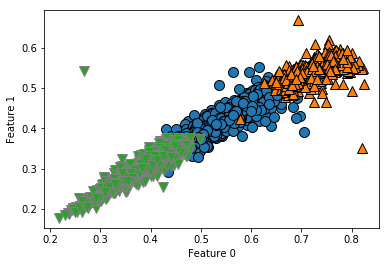

In [14]:
from sklearn.cluster import AgglomerativeClustering
agg= AgglomerativeClustering(n_clusters=3) # 3 clustering 
assignment = agg.fit_predict(scaled_Xdf)
mglearn.discrete_scatter(scaled_Xdf[:, 0],scaled_Xdf[:, 1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [15]:
print('ARI=', metrics.adjusted_rand_score(X_df.Rings,assignment))

ARI= 0.05424457987417029


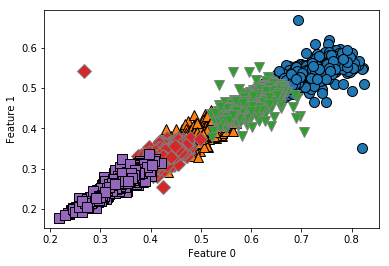

In [16]:
agg = AgglomerativeClustering(n_clusters=5) # 5 clustering 
assignment = agg.fit_predict(scaled_Xdf)
mglearn.discrete_scatter(scaled_Xdf[:, 0],scaled_Xdf[:, 1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [17]:
print('ARI=', metrics.adjusted_rand_score(X_df.Rings,assignment))

ARI= 0.05701006119773212


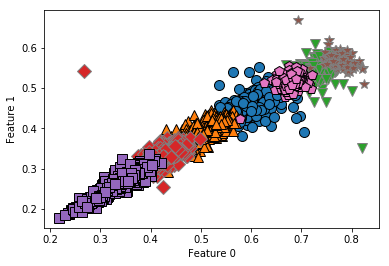

In [18]:
agg = AgglomerativeClustering(n_clusters=7) # 7 clustering 
assignment = agg.fit_predict(scaled_Xdf)
mglearn.discrete_scatter(scaled_Xdf[:, 0],scaled_Xdf[:, 1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [19]:
print('ARI=', metrics.adjusted_rand_score(X_df.Rings,assignment))

ARI= 0.05553645860457584


From the aforementioned Agglomerative clustrings with different cluster size (3,5, and 7), adjusted rand score reveals highest score with 5 clusters.

# Dimensionality Reduction

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
scl=Normalizer()
scl.fit(data)
data_scaled=scl.transform(data)
pca=KernelPCA(n_components=3,kernel="cosine", fit_inverse_transform=True)
pca.fit(data_scaled)

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=True, gamma=None, kernel='cosine',
     kernel_params=None, max_iter=None, n_components=3, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)

In [21]:
X_pca = pca.transform(data_scaled)
print("Original shape: {}".format(str(data_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (4177, 7)
Reduced shape: (4177, 3)


In [22]:
# Nearest centroids 
kmeans = KMeans(n_clusters=10).fit(X_pca)
nearest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X_pca)
print("The nearest centroids are respectively : {}".format(nearest))

The nearest centroids are respectively : [1805 2468 1346 3023  233 4162 1668 3064 1986 2162]


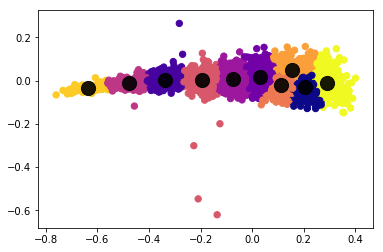

In [23]:
pred = kmeans.predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pred, s=40, cmap="plasma")

cen = kmeans.cluster_centers_
plt.scatter(cen[:, 0], cen[:, 1], c='black', s=200, alpha=0.9);

# Label propagation:

In [24]:
scl=Normalizer()
scl.fit(data)
Xdf_scaled=scl.transform(data)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multiv

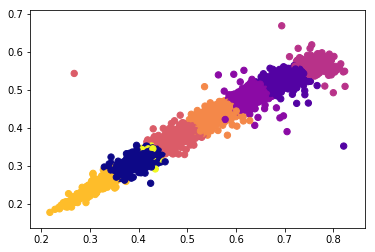

In [25]:
gmm = GMM(n_components=8).fit(Xdf_scaled)
labels = gmm.predict(Xdf_scaled)
plt.scatter(Xdf_scaled[:, 0], Xdf_scaled[:, 1], c=labels, s=40, cmap='plasma');

In [26]:
data_small=X_df.sample(20)
rings= data_small['Rings'].sample(20)
del data_small['Rings']
data_small.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
2084,1,0.690,0.540,0.195,1.2525,0.7300,0.3975,0.462
3227,1,0.450,0.350,0.135,0.5600,0.2310,0.1370,0.145
3025,2,0.495,0.330,0.100,0.4400,0.1770,0.0950,0.150
2461,1,0.500,0.385,0.130,0.7680,0.2625,0.0950,0.270
2096,0,0.500,0.390,0.145,0.6510,0.2730,0.1320,0.220


/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multiv

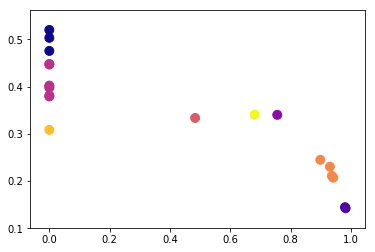

In [27]:
scaler = Normalizer()
scaler.fit(data_small)
data1_scaled = scaler.transform(data_small)
Gausian = GMM(n_components=8).fit(data1_scaled)
labels = Gausian.predict(data1_scaled)
proba = Gausian.predict_proba(data1_scaled)
plt.scatter(data1_scaled[:, 0], data1_scaled[:, 1], c=labels, s=80, cmap='plasma');

Rings to multiple class

In [28]:
Rings = pd.get_dummies(rings)    
Rings_values = np.array(Rings.columns)

In [36]:
Age = proba.T @ Rings
Age_cat = Age / Age.sum(1)[:,None]
classes_pred = gmm.predict_proba(data) @ Age_cat
pred_age = classes_pred @ Rings_values
pred_age.shape

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


(4177,)

In [37]:
pwd

'/Users/shohag/Desktop/BDA/Machine Learning for predictive problems/Machine learning for predictive problems/Assignment 1'